<h1><center>Efficiently Shooting A Basketball!</center></h1>
<h1><center>Calculating the lowest initial velocity to shoot a free throw</center></h1>

<img src="curry.jpg">

### Tired of airballing from the freethrow line? Want to improve your shooting average from the freethrow line? Have you ever wanted to know the physics behind the trajectory of a basketball going through the air?

Using known constants relevant to the trajectory of the shooting of a basketball, we can calculate the lowest initial velocity needed to score from the freethrow line.

# Abstract:

The purpose of this project is to help people understand the physics of the trajectory of a basketball traveling through the air. Hopefully some people reading this project will implement some of the physics into their shot and improve their shooting average from the freethrow line. This project is only evaluating a shot that does not bounce off the rim nor the backboard, meaning the basketball will travel cleanly through the net so you can hear the swish widely known to all basketball fans. We will take into account the drag or air resistance between the basketball and the Earth's atmosphere, as well as gravity. We also used the fourth-order Runge-Kutta method to derive the lowest initial velocity needed to score from the freethrow line.

In [47]:
from math import *
from numpy import arange
from pylab import plot,xlabel,ylabel,show

## Calculating The kd Coefficient:

This coefficent is important regarding the effect the drag or air resistance has on the ball. 

$$kd=\frac{Cd*p*a}{2*m}$$

In [48]:
#Calculating the kd coefficient
Cd=.5 #Drag coefficient
A=.49 #Cross sectional area of the basketball ft**2
m=.041 #Mass of basetball in slugs
p=2.38*10**(-3) #Atmospheric density slugs/ft**3
kd=Cd*p*A/2/m    #1/ft
print("The kd coefficient is",kd)

The kd coefficient is 0.007110975609756097


## Calculating The Perfect Angle The Basketball Enters The Hoop:

θ will be the angle the basketball enters the hoop. We know the diameter of a basketball is .79 ft, and the diameter of the hoop is 1.5 ft. Knowing this, we can use these numbers to calculate the angle the basketball should enter the hoop from. The equation is 

$$θ=arccos(\frac{basketball}{hoop})$$

In [49]:
#Calculating the perfect angle the ball enters the hoop
bball=.79 #Diameter of a basketball ft
hoop=1.5 #Diameter of the hoop ft
radians=  acos(bball/hoop) #58.2 arccos(bball/hoop) degrees
θ=radians*180/pi
print("The best angle θ is", θ, "degrees")

The best angle θ is 58.21948965487635 degrees


This angle maximizes the utility of the initial velocity to it's fullest potential. The more vertical a ball enters the hoop, the greater the initial velocity is needed to increase the trajectory of the basketball. With this angle, it will not touch the rim, but it barely misses it. 

## Initial Conditions:


In [50]:
#Distance between free throw line and hoop horizontally
ftx=13 #ft

#Distance the basketball travels vertically
fty=10-6 # 4ft

#Gravitational constant
g=32.2 #ft/s**2
vx=0 #velocity on x-axis
vy=0 #velocity on y-axis
v=sqrt(vx**2 + vy**2) #Actual velocity
dvx=kd*v*vx #Acceleration on x-axis
dvy=kd*v*vy-g #Acceleration on y-axis


## Defining Our Functions:

In [51]:
def f(vy,t):
    return  6+vy*t-.5*g**2

Our function f(vy,t) is defining the y-coordinate of the trajectory of the basketball. vy is the velocity in the y direction, while t is time.

## Fourth-Order Runge-Kutta:

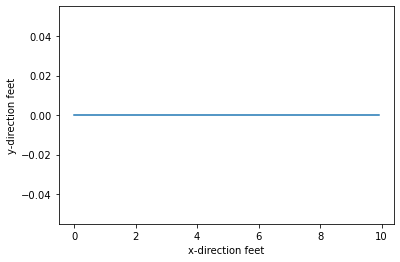

In [52]:
def main(dvx,dvy):
    t=0.0
    a=0.0
    b=10.0
    N=100
    h=(b-a)/N    
    
    tpoints=arange(a,b,h)
    vx=[]
    x=0

    for t in tpoints:
        vx.append(x)
        k1=h*f(x,t)
        k2=h*f(x+.5*k1,t+.5*h)
        k3=h*f(x+.5*k2,t+.5*h)
        k4=h*f(x+k3,t+h)
        dvx+=(k1+2*k2+2*k3+k4)/6

    plot(tpoints,vx)
    xlabel("x-direction feet")
    ylabel("y-direction feet")
    show()
        
if __name__=="__main__":
    main(dvx,dvy)
    

Our function main(dvx,dvy) is defining the acceleration of of the basketball in the x and y direction. The plot didn't turn out how we wanted it, but we were trying to plot the distance traveled in the x and y directions. 

## Finding The Initial Velocity:

In order to find the initial velocity, we use 

$$v=\sqrt{vx^2 +vy^2}$$ 

v is the velocity at a certain time, dependent on the velocity of the basketball in the x and y direction. 

In [53]:
#We need the final code to find the initial velocity, the plot is also wrong which I fix while working on the final code. 
#I will finish the notebook as if I know the answer and hopefully be able to turn it in again. 
#I will then be able to create a conclusion as well.